In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lumicks import pylake

%matplotlib inline

In [30]:
ls

'20190418-180501 Marker 1.h5'*
'20190418-180501 Marker 2.h5'*
'20190418-180501 Marker first session marker 1.h5'*
'20190418-180501 Marker first session marker 2.h5'*
'20190418-183542 polybiotin DNA capture Marker 1.h5'*
'20190418-183624 polybiotin DNA capture Marker 2.h5'*
'20190418-183644 polybiotin DNA capture Calibration 12.h5'*
'20190418-183645 polybiotin DNA capture Calibration 11.h5'*
'20190418-183648 polybiotin DNA capture Calibration 10.h5'*
'20190418-184231 polybiotin DNA capture Marker second session marker 1.h5'*
'20190418-184234 polybiotin DNA capture Marker second session marker 2.h5'*
 avi/


# Files and channels

[Download this page as a Jupyter notebook](_downloads/9b699a876edcd6b0679816cf1aa011af/file.ipynb)

Opening a Bluelake HDF5 file is very simple:

In [31]:
from lumicks import pylake

file = pylake.File("20190418-180501 Marker first session marker 2.h5")

## Contents

To see a textual representation of the contents of a file:

In [32]:
print(file)

File root metadata:
- Bluelake version: 1.5.5
- Description: 
- Experiment: 
- Export time (ns): 1555625101148241500
- File format version: 2
- GUID: {06AD9EA7-50AC-4AA4-AE4E-DFB1FE85C84B}

Bead diameter:
  Template 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 100
  Template 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 100
Bead position:
  Bead 1 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 100
  Bead 1 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 100
  Bead 2 X:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 100
  Bead 2 Y:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 100
Calibration:
  7:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Diagnostics:
  Bright-field LED:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 0
  Microstage position X:
  - Data type: [('Timestamp', '<i8'), ('

For a listing of more specific timeline items:

Text(0,0.5,'Force (pN)')

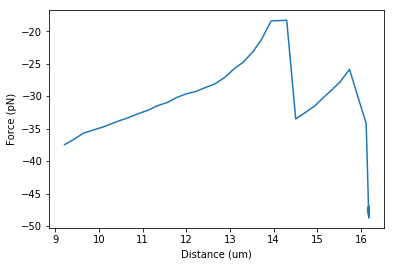

In [96]:
force_data = file["Force LF"]["Force 1x"].data
force_timestamps= file["Force LF"]["Force 1x"].timestamps
distance_data = file["Distance"]["Distance 1"].data
plt.plot(distance_data, force_data)
plt.xlabel("Distance (um)")
plt.ylabel("Force (pN)")

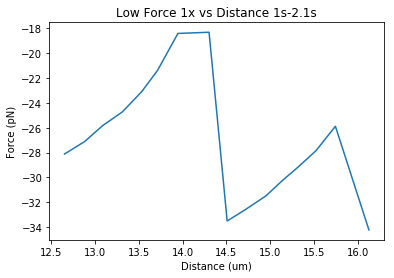

In [113]:
force_data = file["Force LF"]["Force 1x"]
crop_force = force_data['1s':'2.1s']
crop_force = crop_force.data
force_timestamps= file["Force LF"]["Force 1x"].timestamps
distance_data = file["Distance"]["Distance 1"]
crop_distance = distance_data['1s':'2.1s']
crop_distance = crop_distance.data
plt.plot(crop_distance, crop_force)
plt.xlabel("Distance (um)")
plt.ylabel("Force (pN)")
plt.title("Low Force 1x vs Distance 1s-2.1s")
plt.savefig("Low Force 1x vs Distance_1s-2.1s.png")

They can also be printed to get more information:

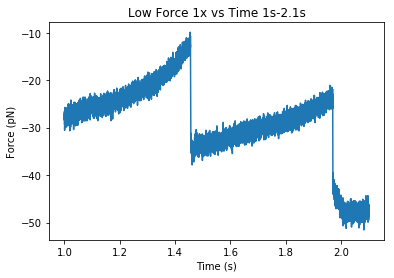

In [114]:
force_data = file["Force HF"]["Force 1x"]
crop = force_data['1s':'2.1s']
crop_force = crop.data
crop_time = crop.timestamps
crop_time = (crop_time - crop_time[0]) * 1e-9 + 1
plt.plot(crop_time, crop_force)
plt.xlabel("Time (s)")
plt.ylabel("Force (pN)")
plt.title("Low Force 1x vs Time 1s-2.1s")
plt.savefig("Low Force 1x vs Time 1s-2.1s.png")

## Channels

Just like the Bluelake timeline, exported HDF5 files contain multiple channels of data. They can be easily accessed as shown below:

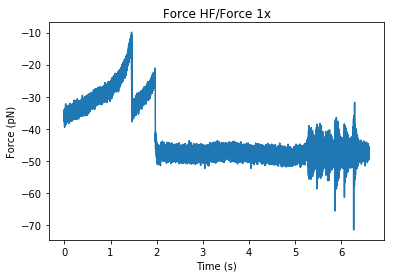

In [37]:
file.force1x.plot()
plt.savefig("force1x.png")

The channels have a few convenient methods, like `.plot()` which make it easy to preview the contents, but you can also always access the raw data directly:

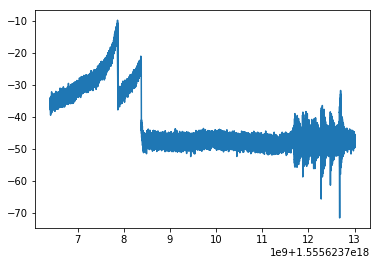

In [38]:
f1x_data = file.force1x.data
f1x_timestamps = file.force1x.timestamps
plt.plot(f1x_timestamps, f1x_data)

The above examples use the `force1x` channel. A full list of available channels can be found on the [`File`](tutorial/../_api/lumicks.pylake.File.html#lumicks.pylake.File) reference page.

By default, entire channels are returned from a file:

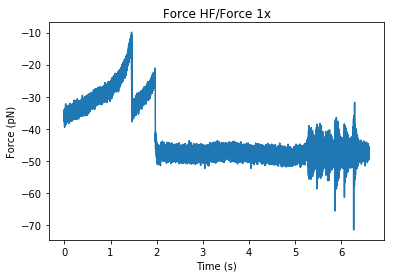

In [39]:
everything = file.force1x
everything.plot()

But channels can easily be sliced:

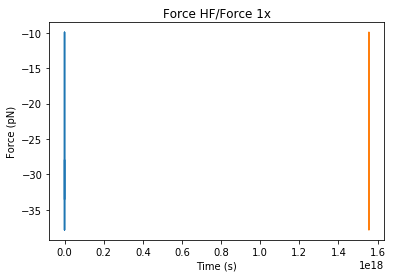

In [40]:
# Get the data between 1 and 1.5 seconds
part = file.force1x['1s':'1.5s']
part.plot()

# Or manually
f1x_data = part.data
f1x_timestamps = part.timestamps
plt.plot(f1x_timestamps, f1x_data)

# More slicing examples
a = file.force1x[:'-5s']  # everything except the last 5 seconds
b = file.force1x['-1m':]  # take the last minute
c = file.force1x['-1m':'-500ms']  # last minute except the last 0.5 seconds
d = file.force1x['1.2s':'-4s']  # between 1.2 seconds and 4 seconds from the end
e = file.force1x['5.7m':'1h 40m']  # 5.7 minutes to an hour and 40 minutes

# Subslicing is also possible
a = file.force1x['1s':]  # from 1 second to the end of the file
b = a['1s':]  # 1 second relative to the start of slice `a`
              # --> `b` starts at 2 seconds relative to the beginning of the file

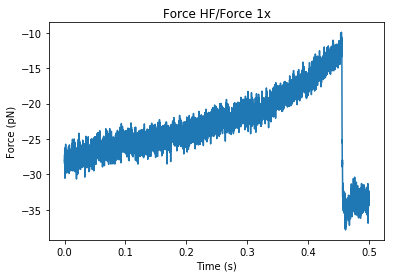

In [48]:
# Get the data between 1 and 1.5 seconds
part_force = file.force1x['1s':'1.5s']
part_disctance = file.distance1['1s':'1.5s']
part.plot()

In [53]:
# Or manually
f1x_data = part_force.data
f1x_timestamps = part_force.timestamps
d1_data = part_distance.data
plt.plot(f1x_timestamps, f1x_data)



NameError: name 'part_distance' is not defined

[12.65481362 12.88426226 13.09178407 13.31343859 13.53607128 13.71518357
 13.94693076]
7


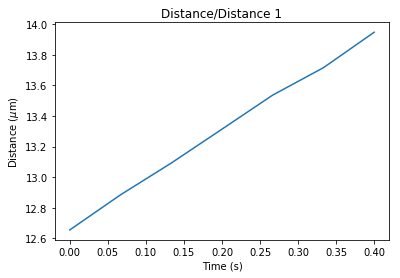

In [84]:
part = file.force1x['1s':'1.5s']
part_LF = LF_force1['1s':'1.5s']
part_distance = file.distance1['1s':'1.5s']
part_distance.plot()
print(part_distance.data)
print(len(part_distance.data))
#f1x_data = part.data
#f1x_timestamps = part.timestamps
#dis1_data = part_distance.data
#plt.plot(dis1_data, f1x_data)

In [44]:
for fxn in dir(file.force1x):
    if not fxn.startswith('_'):
        print(fxn)

data
downsampled_by
labels
plot
sample_rate
timestamps


In [46]:
for fxn in dir(file.distance1):
    if not fxn.startswith('_'):
        print(fxn)

data
downsampled_by
labels
plot
sample_rate
timestamps


Note that channels are indexed in time units using numbers with suffixes. The possible suffixes are d, h, m, s, ms, us, ns, corresponding to day, hour, minute, second, millisecond, microsecond and nanosecond. This indexing only applies to channels slices. Once you access the raw data, those are regular arrays which use regular array indexing:

In [ ]:
channel_slice = file.force1x['1.5s':'20s']  # timestamps
data_slice = file.force1x.data[20:40]  # indices into the array